In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [63]:
# import pandas as pd

# # Load your dataset (ensure the correct path to your file)
# df = pd.read_excel('C:/Users/abhis/OneDrive/Desktop/ML/K-Nearest Neighbors/Online Retail.xlsx', sheet_name='Online Retail')  # Replace with your file path




In [128]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/ML/K-Nearest Neighbors//Mall_Customers.csv')  # Replace with your file path
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [129]:
# cleaning

In [130]:
# Check for missing values
print(df.isnull().sum())

# If any missing values are found, you can fill or drop them
df.fillna(df.mean(), inplace=True)  # For numerical columns

# Drop the 'CustomerID' column as it won't help with segmentation
df.drop(columns=['CustomerID'], inplace=True)

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates if necessary
df.drop_duplicates(inplace=True)


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
0


C:\Users\abhis\AppData\Local\Temp/ipykernel_3020/3565185006.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)  # For numerical columns


In [131]:
# Feature Engineering

In [132]:
# Convert Genre (Male/Female) to numerical values
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

# Select the features for KNN model (Age, Annual Income, Spending Score)
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Features
y = df['Spending Score (1-100)']  # Example: Predicting gender, you can modify the target variable for segmentation




In [133]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [134]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [135]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [136]:
# Build the KNN Model

In [137]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model (using k=4 for now)
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [138]:
# Evaluate the Model

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.03333333333333333
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_cla

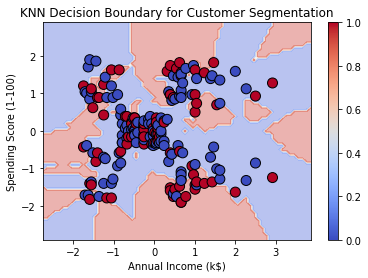

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Select only two features for easy visualization (e.g., 'Annual Income' and 'Spending Score')
X_vis = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Features for visualization
y_vis = df['Genre']  # Target variable (Gender)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Create the KNN model and fit it on the data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_vis_scaled, y_vis)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
plt.title('KNN Decision Boundary for Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()
